In [51]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import RobustScaler

In [52]:
data = pd.read_csv("files_for_lab/marketing_customer_analysis.csv")

Cleaning/Wrangling/EDA

In [53]:
data.head()
print("data.shape",data.shape)
print(data.columns)
data.info()

data.shape (9134, 24)
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   C

In [54]:
data = data.rename(columns={"EmplymentStatus" : "Employment Status"})

In [55]:
#checking for empty columns and rows

data_der = data.dropna(axis = 0, how = "all") #drops empty rows
data1 = data_der.dropna(axis = 1, how = "any") #drops empty columns

display (data1.isna().sum()) 
#filling the empty columns with the average of the column
data1 = data1.mask(data1 == 0).fillna(data1.mean())

display (data1.isna().sum()) 

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [56]:
#separating numerical and categorical columns

data1_cat = data1.select_dtypes("object")
data1_num = data1.select_dtypes("float", "int")


print(list(data1_cat.columns))

print(list(data1_num.columns))

['Customer', 'State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
['Customer Lifetime Value', 'Income', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Total Claim Amount']


Column >> Customer Lifetime Value
Column >> Income
Column >> Months Since Last Claim
Column >> Months Since Policy Inception
Column >> Number of Open Complaints
Column >> Total Claim Amount


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


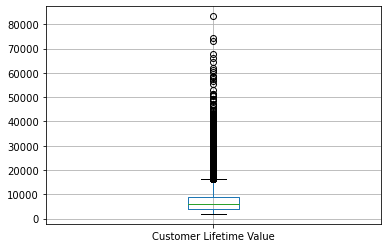

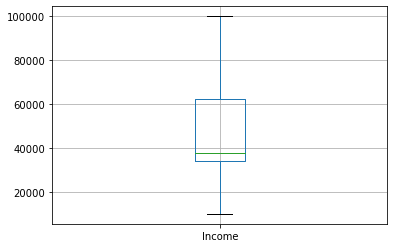

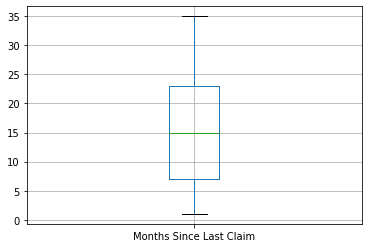

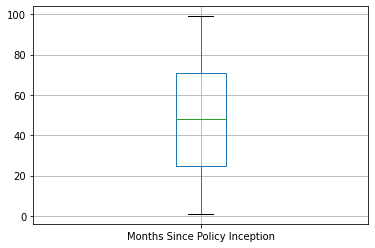

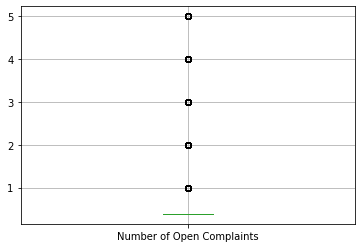

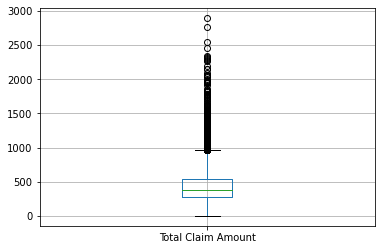

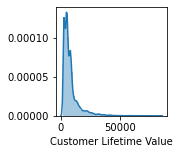

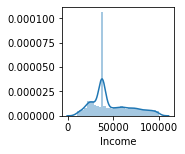

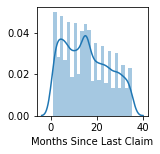

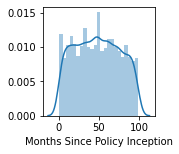

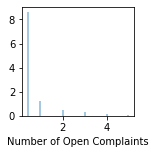

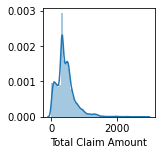

In [57]:
cols = list(data1_num.columns)

for col in list(data1_num.columns):
    plt.figure()
    data1_num.boxplot([col])
    
for col in list(data1_num.columns): 
    print("Column >>", col)
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.distplot(data1_num[col])
    plt.show
    
    

In [58]:
display(data1_num.corr())

,Customer Lifetime Value,Income,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount
Customer Lifetime Value,1.000000,0.010481,0.017931,0.007926,-0.039033,0.226451
Income,0.010481,1.000000,-0.030490,0.010211,0.013335,-0.246283
Months Since Last Claim,0.017931,-0.030490,1.000000,-0.037378,0.004364,0.006060
Months Since Policy Inception,0.007926,0.010211,-0.037378,1.000000,-0.000045,0.004325
Number of Open Complaints,-0.039033,0.013335,0.004364,-0.000045,1.000000,-0.012363
Total Claim Amount,0.226451,-0.246283,0.006060,0.004325,-0.012363,1.000000


In [59]:
#Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor


#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data1_num.columns.copy()

#calculating VIF for the independent features
vif_data["VIF"] = [variance_inflation_factor(data1_num.values, i) for i in (range(len(data1_num.columns)))]

vif_data

,feature,VIF
0,Customer Lifetime Value,2.439929
1,Income,3.756904
2,Months Since Last Claim,2.993053
3,Months Since Policy Inception,3.356109
4,Number of Open Complaints,1.692261
5,Total Claim Amount,2.903266


In [64]:
#IQR

data1_num1 = data1_num.copy()
display(data1_num1.head())

data1_num2 = list()

for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    Max = Q3+1.5*(Q3-Q1)
    Min = Q1-1.5*(Q3-Q1)
    data1_num2 = list(data1_num[(data1_num[col]<Min)|(data1_num[col]>Max)].index)
    
    
    
print("Column: ", col)
print("Q1 is: ", Q1)
print("Q3 is: ", Q3)
print("Max is:", Max)
print("Min is:", Min)
print("Number of outliers: ", len(data1_num2))

    

,Customer Lifetime Value,Income,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount
0,2763.519279,56274.000000,32.0,5.0,0.384388,384.811147
1,6979.535903,37657.380009,13.0,42.0,0.384388,1131.464935
2,12887.431650,48767.000000,18.0,38.0,0.384388,566.472247
3,7645.861827,37657.380009,18.0,65.0,0.384388,529.881344
4,2813.692575,43836.000000,12.0,44.0,0.384388,138.130879


Column:  Total Claim Amount
Q1 is:  272.2582445
Q3 is:  547.5148387500001
Max is: 960.3997301250002
Min is: -140.62664687500018
Number of outliers:  453


Customer Lifetime Value          3.031782
Income                           0.701777
Months Since Last Claim          0.285431
Months Since Policy Inception    0.042642
Number of Open Complaints        3.188360
Total Claim Amount               1.714684
dtype: float64

Q-Q plot for variable:  Customer Lifetime Value
Q-Q plot for variable:  Income
Q-Q plot for variable:  Months Since Last Claim
Q-Q plot for variable:  Months Since Policy Inception
Q-Q plot for variable:  Number of Open Complaints
Q-Q plot for variable:  Total Claim Amount


array([13.8153107 , -0.43446949, -1.00831824, -1.11594477, 10.38196679,
        5.97547158])

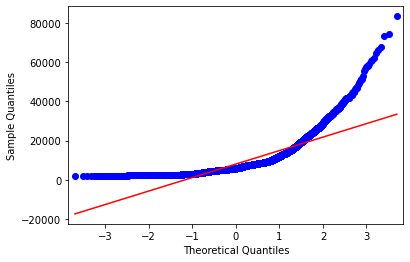

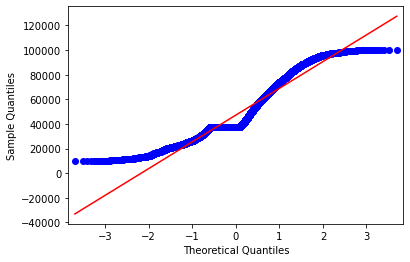

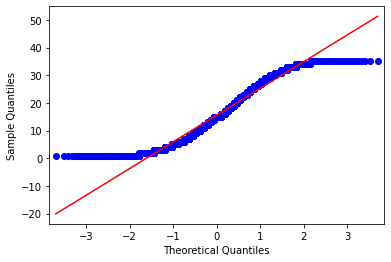

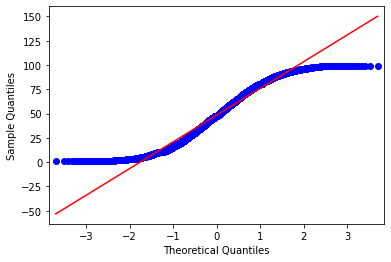

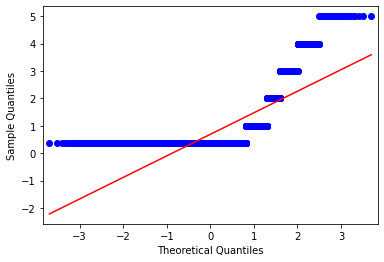

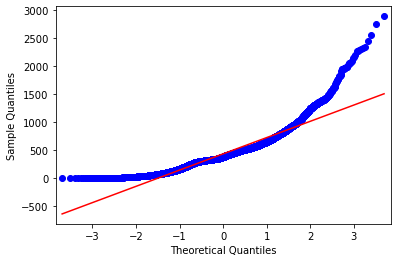

In [70]:
#Normality Tests
    #Skewness and spikeness
from scipy.stats import skew
display(data1_num1.apply(skew))

    #Q-Q Plot
from statsmodels.graphics.gofplots import qqplot
cols = list(data1_num1.columns)
for col in cols:
    print("Q-Q plot for variable: ", col)
    qqplot(data1_num1[col], line = "s")
    pyplot.show
    
    #Kurtosis
from scipy import stats
from scipy.stats import kurtosis
kurtosis(data1_num1)


Customer Lifetime Value          83325.381190
Income                           99981.000000
Months Since Last Claim             35.000000
Months Since Policy Inception       99.000000
Number of Open Complaints            5.000000
Total Claim Amount                2893.239678
dtype: float64

Customer Lifetime Value           1898.007675
Income                           10037.000000
Months Since Last Claim              1.000000
Months Since Policy Inception        1.000000
Number of Open Complaints            0.384388
Total Claim Amount                   0.099007
dtype: float64

,Customer Lifetime Value,Income,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount
0,0.010629,0.514064,0.911765,0.040816,0.000000,0.132974
1,0.062406,0.307084,0.352941,0.418367,0.000000,0.391051
2,0.134960,0.430601,0.500000,0.377551,0.000000,0.195764
3,0.070589,0.307084,0.500000,0.653061,0.000000,0.183117
4,0.011245,0.375778,0.323529,0.438776,0.000000,0.047710
...,...,...,...,...,...,...
9129,0.264137,0.688250,0.500000,0.897959,0.000000,0.068485
9130,0.014719,0.128602,0.382353,0.275510,0.000000,0.131034
9131,0.076951,0.307084,0.235294,0.367347,0.566688,0.273297
9132,0.069098,0.132349,0.970588,0.020408,0.000000,0.238876


Customer Lifetime Value          0
Income                           0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Total Claim Amount               0
dtype: int64

column >> Customer Lifetime Value


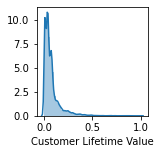

column >> Income


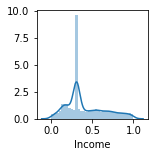

column >> Months Since Last Claim


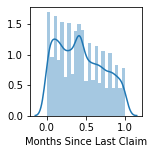

column >> Months Since Policy Inception


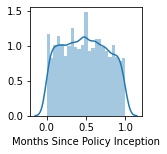

column >> Number of Open Complaints


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


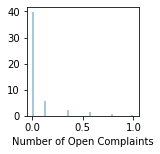

column >> Total Claim Amount


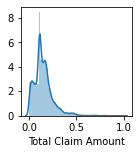

In [76]:
#MinMaxScaler Transformaiton
from sklearn.preprocessing import MinMaxScaler

display(data1_num1.max())
display(data1_num1.min())

x = data1_num1.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data1_num3 = pd.DataFrame(x_scaled)
data1_num3.columns = data1_num1.columns
display(data1_num3)

display(data1_num3.isna().sum())
for col in cols:
    print("column >>", col)
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.distplot(data1_num3[col])
    plt.show()


In [78]:
#log transformation
data1_num3 = data1_num3.mask(data1_num3 == 0). fillna(data1_num3.mean())
display(data1_num3.head())
data1_num3["Monthly Premium Auto"] = np.log(data1_num3["Monthly Premium Auto"])
data1_num3["Number of Oper Complaints"] = np.log(data1_num3["Number of Oper Complaints"])

for col in cols:
    print("column >>", col)
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.distplot(data1_num3[col])
    plt.show

,Customer Lifetime Value,Income,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount
0,0.010629,0.514064,0.911765,0.040816,0.066121,0.132974
1,0.062406,0.307084,0.352941,0.418367,0.066121,0.391051
2,0.134960,0.430601,0.500000,0.377551,0.066121,0.195764
3,0.070589,0.307084,0.500000,0.653061,0.066121,0.183117
4,0.011245,0.375778,0.323529,0.438776,0.066121,0.047710


KeyError: 'Monthly Premium Auto'

In [79]:
#Normalization of all columns

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data1_num3)
data1_num4 = pd.DataFrame(transformer.transform(data1_num3))
data1_num4.columns = data1_num3.columns
display(data1_num4)
data1_num4.apply(skew)

,Customer Lifetime Value,Income,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount
0,0.010046,0.485873,0.861764,0.038578,0.062495,0.125682
1,0.083761,0.412171,0.473720,0.561536,0.088748,0.524872
2,0.168849,0.538727,0.625552,0.472355,0.082724,0.244921
3,0.078255,0.340433,0.554299,0.723983,0.073301,0.203003
4,0.016854,0.563202,0.484893,0.657620,0.099099,0.071506
...,...,...,...,...,...,...
9129,0.208243,0.542611,0.394196,0.707944,0.052129,0.053993
9130,0.028844,0.252018,0.749284,0.539908,0.129574,0.256784
9131,0.092883,0.370666,0.284012,0.443406,0.684021,0.329883
9132,0.068210,0.130650,0.958126,0.020146,0.065272,0.235809


Customer Lifetime Value          2.553393
Income                           0.254488
Months Since Last Claim         -0.093023
Months Since Policy Inception   -0.320516
Number of Open Complaints        2.997617
Total Claim Amount               1.336895
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

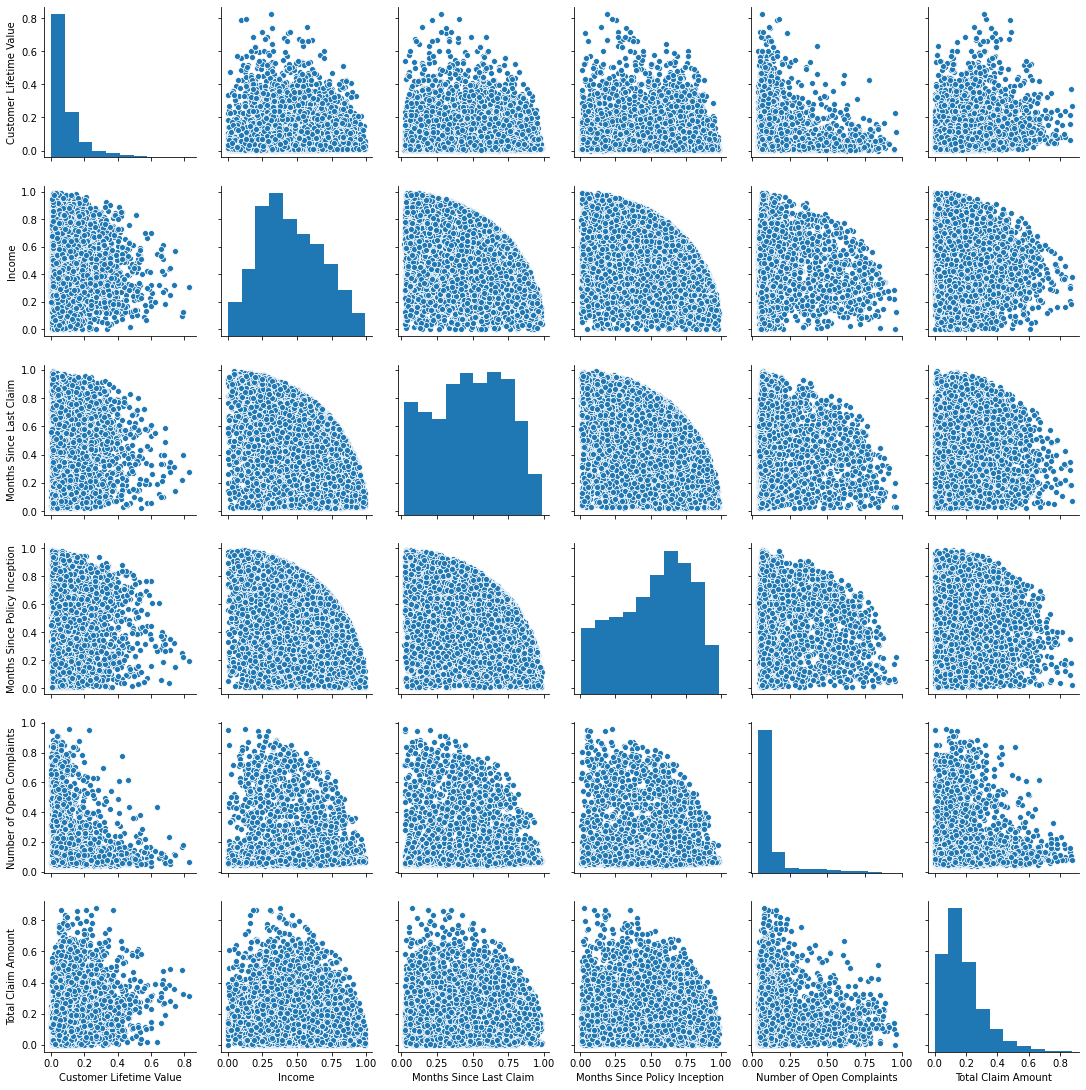

In [84]:
#PairPlot
sns.pairplot(data1_num4)
plt.show

In [87]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
data1_cat2 = pd.DataFrame()

data1_cat3 = data1_cat.drop(["Customer", "Effective To Date"], axis = 1)

data1_cat2 = pd.get_dummies(data1_cat3)

display(data1_cat3)


,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [89]:
#Concatenate Frames

data1_num5 = data1_num4.reset_index()
data1_cat4 = data1_cat3.reset_index()

data2 = pd.concat([data1_num5,data1_cat4], axis = 1)
display(data2)

,index,Customer Lifetime Value,Income,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,index,State,Response,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,0,0.010046,0.485873,0.861764,0.038578,0.062495,0.125682,0,Washington,No,...,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,1,0.083761,0.412171,0.473720,0.561536,0.088748,0.524872,1,Arizona,No,...,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,2,0.168849,0.538727,0.625552,0.472355,0.082724,0.244921,2,Nevada,No,...,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,3,0.078255,0.340433,0.554299,0.723983,0.073301,0.203003,3,California,No,...,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,4,0.016854,0.563202,0.484893,0.657620,0.099099,0.071506,4,Washington,No,...,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,0.208243,0.542611,0.394196,0.707944,0.052129,0.053993,9129,California,No,...,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,9130,0.028844,0.252018,0.749284,0.539908,0.129574,0.256784,9130,California,Yes,...,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,9131,0.092883,0.370666,0.284012,0.443406,0.684021,0.329883,9131,California,No,...,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,9132,0.068210,0.130650,0.958126,0.020146,0.065272,0.235809,9132,California,No,...,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [95]:
#Train Split
from sklearn.model_selection import train_test_split

Y = data1_num1["Total Claim Amount"]
X = data2

X_train, X_test, Y_train, Y_test, = train_test_split(X,Y,test_size = 0.3, random_state = 15)
X_train.head()


,index,Customer Lifetime Value,Income,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,index,State,Response,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
1749,1749,0.041297,0.571591,0.353183,0.735197,0.052933,0.059350,1749,Arizona,No,...,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Large
4165,4165,0.195938,0.122541,0.855430,0.173123,0.080129,0.422421,4165,Washington,No,...,Disabled,M,Suburban,Single,Personal Auto,Personal L1,Offer4,Agent,Luxury Car,Small
6405,6405,0.075209,0.164519,0.561986,0.788377,0.054931,0.163991,6405,Oregon,No,...,Medical Leave,M,Suburban,Married,Personal Auto,Personal L2,Offer1,Web,Sports Car,Small
6102,6102,0.421482,0.273441,0.576170,0.526998,0.058877,0.366631,6102,California,No,...,Unemployed,M,Suburban,Single,Personal Auto,Personal L3,Offer1,Call Center,SUV,Medsize
7945,7945,0.092759,0.774019,0.168980,0.597982,0.075977,0.019515,7945,Nevada,No,...,Employed,M,Rural,Married,Corporate Auto,Corporate L3,Offer4,Call Center,SUV,Small


Applying the Model

In [104]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() 
lm = model.fit(X_train,Y_train)
predictions = lm.predictions(X_test)
residuals = predictions - Y_test
sns.distplot(residuals)

ValueError: could not convert string to float: 'Arizona'

In [105]:
from sklearn.metrics import mean_absolut_error, mean_squared_error, r2_score

MAE = mean_absolut_error(Y_test, predictions)
MSE = mean_square_error(Y_test, predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(Y_test, predictions)


print("MAE of the model is: %5,3f"%(MAE))
print("MSE of the model is: %5,3f"%(MSE))
print("RMSE of the model is: %5,3f"%(RMSE))
print("R2 of the model is: %5,3f"%(R2))

ImportError: cannot import name 'mean_absolut_error' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

Aplying the Model

In [106]:
model = LinearRegression()
lm = model.fit(X_train,Y_train)
predictions = lm.predict(X_test)
residuals = predictions - Y_test
sns.displot(residuals)

ValueError: could not convert string to float: 'Arizona'